# Pymaceuticals Inc.
---

### Analysis

- The gender of the mice sampled for this experiment was balanced equally with male mice representing 51% and females representing 49%
- There is a positive correlation between mouse weight and tumor volume, as the p value is .84, meaning there is significant evidence to prove that weight has an effect on the size of the tumor. (Disclaimer: This statement is accurate only for the results of the mice treated with Capomulin.)
 

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "../Downloads/Mouse_metadata.csv"
study_results_path = "../Downloads/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
repeating = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
repeating

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[merged_df["Mouse ID"].isin(repeating)==False]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = cleaned_df.groupby("Drug Regimen")


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mice_mean = summary_df["Tumor Volume (mm3)"].mean()
mice_median = summary_df["Tumor Volume (mm3)"].median()
mice_var = summary_df["Tumor Volume (mm3)"].var()
mice_stdev = summary_df["Tumor Volume (mm3)"].std()
mice_sem = summary_df["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
tumor_sum_df = pd.DataFrame({
    "Mean Tumor Volume": mice_mean,
    "Median Tumor Volume": mice_median,
    "Tumor Volume Variance": mice_var,
    "Tumor Volume Std. Dev.": mice_stdev,
    "Tumor Volume Std. Err.": mice_sem
})

tumor_sum_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumor_agg = cleaned_df[cleaned_df["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg(["Mean", "Median", "Variance", "Standard Deviation", "Standard Error"])
tumor_agg

KeyError: ('Drug Regimen', 'Tumor Volume (mm3)')

## Bar and Pie Charts

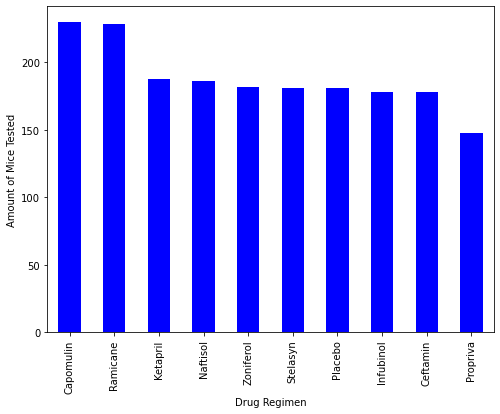

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_timepoints = cleaned_df["Drug Regimen"].value_counts()

mice_bar = plt.figure(figsize=(8,6))
mice_bar = total_timepoints.plot(kind='bar', color='blue')
mice_bar.set_xlabel("Drug Regimen")
mice_bar.set_ylabel("Amount of Mice Tested")

plt.show()


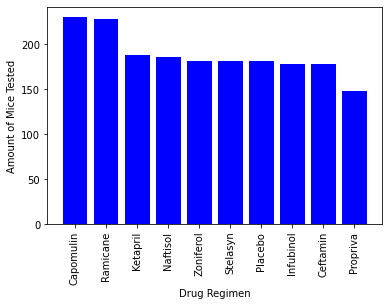

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
fig1, pyplot_mice_graphs = plt.subplots()
x_axis = total_timepoints.index.values
y_axis = total_timepoints.values
pyplot_mice_graphs = plt.bar(x_axis, y_axis, color='blue')
plt.xlabel("Drug Regimen")
plt.ylabel("Amount of Mice Tested")
plt.xticks(rotation='vertical')
plt.show()


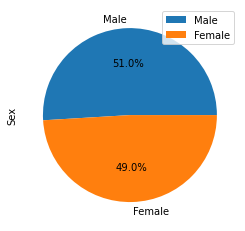

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = pd.DataFrame(cleaned_df["Sex"].value_counts())
mice_gender.plot.pie(y = "Sex", autopct="%1.1f%%")
plt.show()


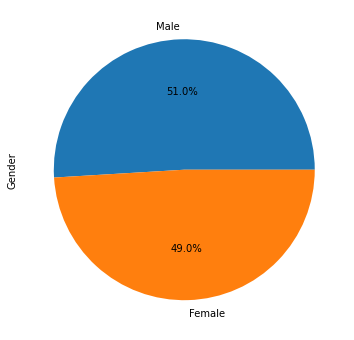

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
gender_plot = plt.figure(figsize=(6,6))
gender_plot = plt.pie(mice_gender["Sex"], labels=labels, autopct="%1.1f%%")
plt.ylabel("Gender")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_final = pd.DataFrame(cleaned_df)
tumor_final = tumor_final.sort_values("Timepoint")


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

effective_treatments = tumor_final[tumor_final["Drug Regimen"].isin(treatment_list)]
effective_treatments = effective_treatments.reset_index()
# Create empty list to fill with tumor vol data (for plotting)
empty_tum_list = []

for treatment in treatment_list:
    last_vol = effective_treatments.loc[effective_treatments["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    empty_tum_list.append(last_vol)
    
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = last_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    outliers = last_vol.loc[(last_vol < lower_bound) | (last_vol > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: 699    25.472143
763    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 756    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


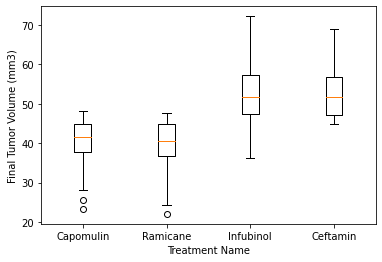

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, mice_box = plt.subplots()
mice_box.set_xlabel("Treatment Name")
mice_box.set_ylabel("Final Tumor Volume (mm3)")
mice_box.boxplot(empty_tum_list, labels=treatment_list, widths=.2)
plt.show()


## Line and Scatter Plots

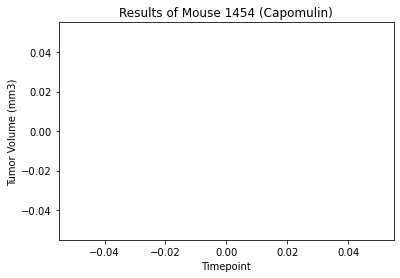

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
mouse_cap = capomulin.loc[capomulin["Mouse ID"] == "1454",:]
cap_time = mouse_cap["Timepoint"]
cap_tumorvol = mouse_cap["Tumor Volume (mm3)"]

fig1, mouse_cap_line = plt.subplots()
mouse_cap_line = plt.plot(cap_time, cap_tumorvol, color='blue')
plt.title("Results of Mouse 1454 (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

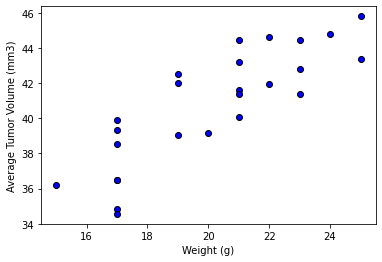

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
avg_mice_cap = capomulin.groupby(["Mouse ID"]).mean()

fig1, mice_scatter = plt.subplots()
mice_scatter = plt.scatter(avg_mice_cap["Weight (g)"], avg_mice_cap["Tumor Volume (mm3)"], marker='o', facecolors='blue', edgecolors='black')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_mice_cap["Weight (g)"], avg_mice_cap["Tumor Volume (mm3)"])
print(f"The correlation between the weight and the average tumor volume of mice is {round(correlation[0],2)}")


In [29]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_mice_cap["Weight (g)"], avg_mice_cap["Tumor Volume (mm3)"])
regression_val = avg_mice_cap["Weight (g)"] * slope + intercept
equation_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(equation_string)

y = 0.95x + 21.55
